# Taux de churn des clients en télécommunication

La prédiction de churn signifie détecter quels clients sont susceptibles d'annuler un abonnement à un service en fonction de la façon dont ils utilisent le service. Il s'agit d'une prévision essentielle pour de nombreuses entreprises notamment des banks et et des entreprises de télécommiunication. En effet, l'acquisition de nouveaux clients coûte souvent plus cher que la fidélisation des clients existants. Ainsi il est important pour les entreprises d'identifier les clients qui risquent de se désabonner,afin de savoir exactement quelle action marketing entreprendre pour maximiser les chances que les clients restent.



### Obejctifs

Pour réduire le churn des clients, les entreprises de télécommunications doivent prévoir quels clients sont à haut risque d'attrition. Dans cet article, nous allons montrer étape par étape, comment utiliser les outils de data science pour analyser les données des clients d'une entreprise de télécommunications, identifier les principaux indicateurs de désabonnement et créer des modèles prédictifs pour identifier les clients à haut risque de se désabonner.




Les données utilisées ici sont de libre accès dont on peut trouver sur le site d'IBM.


## Les étapes 

### 1. Lecture de données
### 2. Analyse exploratoire des données et nettoyage des données
### 3. Visualisation de données
### 4. Importance des variables
### 5. Feature Engineering
### 6. Définir une baseline
### 7. découpage du jeu de données
### 8. Comparaison des algorithmes
### 9. Conclusion


### 1. Lecture des données

Cette première partie concerne la lecture des données en utilisant la fonction pandas.read_csv. Cella permet de se familliariser avec les donnés et leurs natures.

In [1]:
# Importation de libraries necssaires
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:

#importer les données. Ici les données sont stockées localement dans ma machine.
df=pd.read_csv('data.csv')

# visualiser le nom des colonnes
df.columns



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
# regarder la forme des données
df.shape

(7043, 21)

In [4]:
# Avoir certaines informations statistique sur les données.Les statistiques concernent uniquement les colonnes à caracteres numeriques
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# vérifier les valeurs uniques de chaque colonne. pour la colonne gender les valeurs possibles sont Female et Male.
# Pour la colonne SeniorCitizen, c'est sont les valeurs 0 et 1 qui se repète ainsi de suite.

for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

Comme indiqué ci-dessus, l'ensemble de données contient 19 variables (colonnes) indépendantes, qui peuvent être classées en 3 groupes :



#### 1 Informations démographiques

* genre : Si le client est une femme ou un homme (Female, Male).
    
* SeniorCitizen : Si le client est un senior ou non ( 0, 1).
    
* Partener : Si le client a un partenaire ou non (Yes, No).
    
* Dependents : Si le client a des personnes à charge ou non (Yes, no).



#### 2 Informations sur le compte client

* tenure : nombre de mois pendant lesquels le client est resté dans l'entreprise (plusieurs valeurs numériques différentes).
* Contract : indique le type de contrat actuel du client (mois par mois, un an, deux ans).
* PaperlessBilling : Si le client a ou non une facturation sans papier (Yes, No).
* PaymentMethod : Mode de paiement du client. cela peut etre Chèque électronique, Chèque postal, Virement bancaire, Carte de crédit.
* MontlyCharges : Le montant facturé au client mensuellement (plusieurs valeurs numériques différentes).
* TotalCharges : le montant total facturé au client (plusieurs valeurs numériques différentes).

#### 3 Informations sur les services

* PhoneService : si le client dispose d'un service téléphonique ou non (Yes, No).
* MultipleLines : Si le client a plusieurs lignes ou non (No internet service, No, Yes).
* InternetServices : Si le client est abonné au service Internet auprès de l'entreprise (DSL, Fiber optic, No)
* OnlineSecurity : si le client dispose ou non d'une sécurité en ligne (No internet service, No, Yes).
* OnlineBackup : Si le client dispose ou non d'une sauvegarde en ligne (No internet service, No, Yes).
* DeviceProtection : si le client dispose ou non d'une protection d'appareil (No internet service, N, Yes).
* TechSupport : Si le client dispose d'un support technique ou non (No internet service, No, Yes).
* StreamingTV : si le client dispose ou non de la télévision en streaming (No internet service, No, Yes).
* StreamingMovies : si le client a des films en streaming ou non (No internet service, No, Yes).



In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Analyse exploratoire des données et nettoyage des données

L'analyse exploratoire des données consiste à analyser les principales caractéristiques d'un ensemble de données, généralement au moyen de méthodes de visualisation et de statistiques. L'objectif est de comprendre les données, de découvrir des modèles et des anomalies, et de vérifier les hypothèses avant d'effectuer d'autres évaluations.

### Types de données et valeurs manquantes

A ce stade, nous voulons connaître autant d'informations que possible sur les données, c'est à ce moment que la méthode pandas.DataFrame.info est utile. Cette méthode imprime un résumé concis du bloc de données, y compris les noms de colonne et leurs types de données, le nombre de valeurs non nulles et la quantité de mémoire utilisée par le bloc de données.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

Comme indiqué ci-dessus, l'ensemble de données contient 7043 observations et 21 colonnes. Apparemment, il n'y a pas de valeurs nulles sur l'ensemble de données ; cependant, nous observons que la colonne TotalCharges a été détectée à tort comme un objet. Cette colonne représente le montant total facturé au client et il s'agit donc d'une variable numérique. Pour une analyse plus approfondie, nous devons transformer cette colonne en un type de données numériques. Pour ce faire, nous pouvons utiliser la fonction pd.to_numeric. Par défaut, cette fonction déclenche une exception lorsqu'elle voit des données non numériques ; cependant, nous pouvons utiliser l'argument errors='coerce' pour ignorer ces cas et les remplacer par un NaN.



In [21]:
# transformer la colonne TotalCharges en un type de données numérique
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Nous pouvons maintenant observer que la colonne TotalCharges a 11 valeurs manquantes.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
#observations nulles de la colonne TotalCharges
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Pour ces 11 observations dont la Charge totale est nulle, on peut voir que leur charge mensuelle correspondente est non nulle ce qui semble contradictoire, par conséquent, nous décidons de supprimer ces observations de l'ensemble de données.


In [23]:
# supprimer les lignes dont la valeur du colonne monthlyCharge est nulle
df.dropna(inplace=True)

La colonne customerID est inutile pour expliquer si non ou oui le client va se désabonner. Par conséquent, nous supprimons cette colonne de l'ensemble de données.

In [24]:
# supprimez la colonne customerID de l'ensemble de données
df.drop(columns='customerID', inplace=True)

Comme indiqué ci-dessous, certaines dénominations de moyens de paiement contiennent entre parenthèses le mot automatique. Ces dénominations sont trop longues pour être utilisées comme étiquettes de coche dans d'autres visualisations. Par conséquent, nous supprimons cette clarification entre parenthèses des entrées de la colonne PaymentMethod.

In [25]:
#éléments uniques de la colonne PaymentMethod
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
# supprimer (automatic) de noms de moyens de paiement
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [27]:
# éléments uniques de la colonne PaymentMethod après la modification 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

# 3. Visualisation des données

Dans cette section, nous analysons les données en utilisant la visualisation.



## Variable de réponse

Le graphique à barres suivant montre le pourcentage d'observations qui correspondent à chaque classe de la variable de réponse : non et oui. 



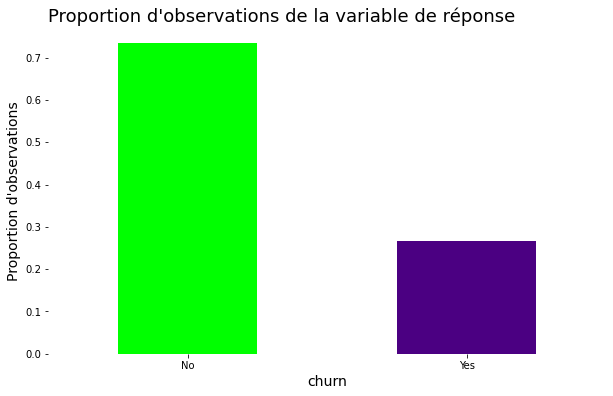

In [28]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['lime','indigo'])

# set title and labels
ax.set_title("Proportion d'observations de la variable de réponse",
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel("Proportion d'observations",
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

Comme indiqué ci-dessous, il s'agit d'un ensemble de données déséquilibré car les deux classes ne sont pas également réparties entre toutes les observations, n'étant pas la classe majoritaire (73,42%). Lors de la modélisation, ce déséquilibre conduira à un grand nombre de faux négatifs, comme nous le verrons plus loin.

Pour la suite, nous allons utiliser des graphiques à barres empilées normalisés pour analyser l'influence de chaque variable catégorique indépendante sur le résultat.

Un graphique à barres empilées normalisé donne à chaque colonne la même hauteur, il n'est donc pas utile pour comparer les nombres totaux ; cependant, il est parfait pour comparer la façon dont la variable de réponse varie dans tous les groupes d'une variable indépendante.

D'autre part, nous utilisons des histogrammes pour évaluer l'influence de chaque variable numérique indépendante dans le résultat. Comme mentionné précédemment, l'ensemble de données est déséquilibré ; par conséquent, nous devons dessiner une fonction de densité de probabilité de chaque classe (density=True) pour pouvoir comparer correctement les deux distributions.



## Informations démographiques
Le code suivant crée un graphique à barres de pourcentage empilé pour chaque attribut démographique (Genre, SeniorCitizen, Partner, Dependents), indiquant le pourcentage de désabonnement pour chaque catégorie de l'attribut.



In [29]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Imprime un tracé empilé à 100 % de la variable de réponse pour la variable indépendante de la liste columns_to_plot.
            Paramètres:
                    columns_to_plot (list of string): Noms des variables à tracer
                    super_title (string) : super titre de la visualisation
            Retour:
                    Aucun


    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # créer une figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # boucle à chaque nom de colonne pour créer une sous-parcelle
    for index, column in enumerate(columns_to_plot, 1):

        
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculer le pourcentage d'observations de la variable réponse pour chaque groupe de la variable indépendante
        # Diagramme à barres empilées à 100 %


        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['lime','indigo'])

        # définir la légende dans le coin supérieur droit
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title(" Proportion d'observations par" + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

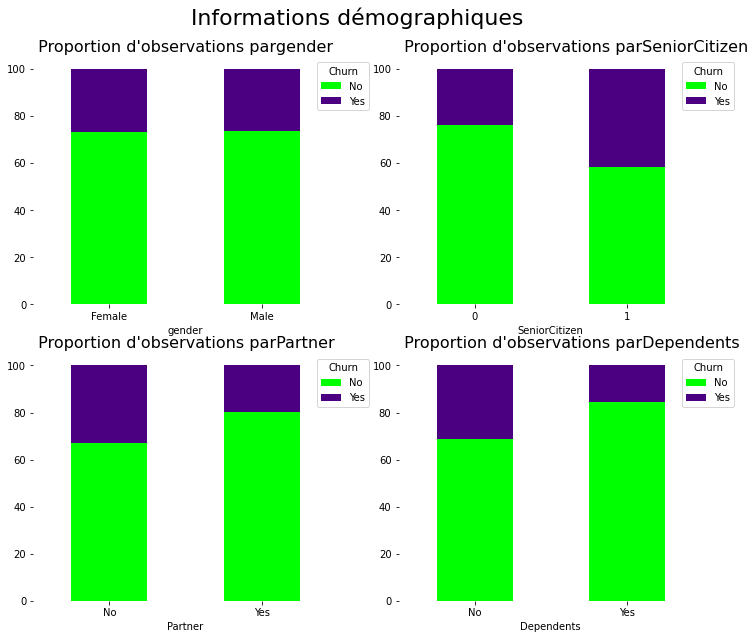

In [14]:
# noms des colonnes demographiques
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stracé cloué des colonnes démographiques
percentage_stacked_plot(demographic_columns, 'Informations démographiques')

Comme indiqué ci-dessus, chaque barre est une catégorie de la variable indépendante, et elle est subdivisée pour montrer la proportion de chaque classe de réponse (Non et Oui).

Nous pouvons extraire les conclusions suivantes en analysant les attributs démographiques :

Le taux de churn des seniors est presque le double de celui des jeunes.
Nous ne nous attendons pas à ce que le sexe ait un pouvoir prédictif significatif.
Un pourcentage de désabonnement similaire est affiché à la fois lorsqu'un client est un homme ou une femme.
Les clients avec un partenaire résilient moins que les clients sans partenaire.



### Informations sur le compte client — Variables catégorielles

Comme nous l'avons fait avec les attributs démographiques, nous évaluons le pourcentage de Churn pour chaque catégorie des attributs du compte client (Contrat, PaperlessBilling, PaymentMethod).



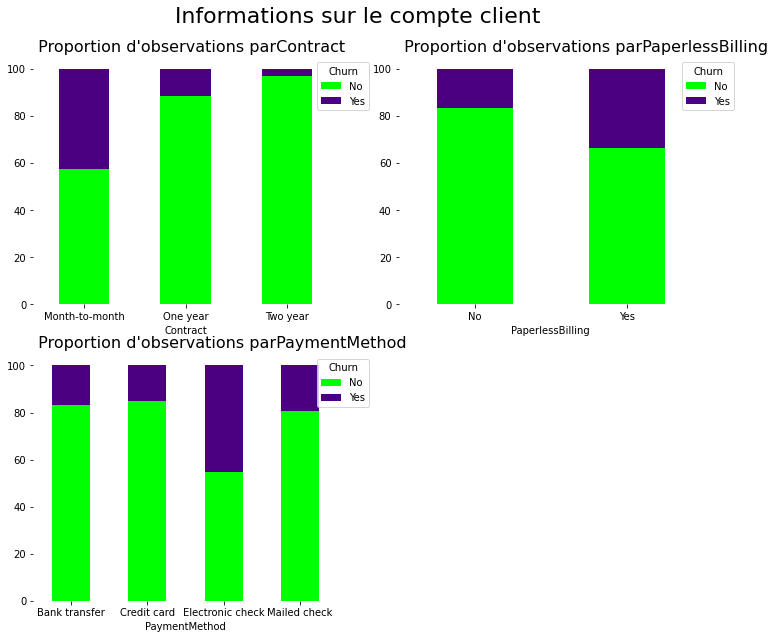

In [30]:
# noms des colonnes de compte client
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# tracer des colonnes démographiques
percentage_stacked_plot(account_columns, 'Informations sur le compte client')

Nous pouvons extraire les conclusions suivantes en analysant les attributs du compte client :

Les clients avec des contrats mensuels ont de taux de churn plus élevé que les clients avec des contrats annuels. Les clients qui ont opté pour un chèque électronique comme mode de paiement sont plus susceptibles de quitter l'entreprise. Les clients abonnés à la facturation dématérialisée chuttent plus que ceux qui ne sont pas abonnés.

### Informations sur le compte client — Variables numériques

Les graphiques suivants montrent la répartition de la durée d'occupation, MontlyCharges, TotalCharges by Churn. Pour tous les attributs numériques, les distributions des deux classes (Non et Oui) sont différentes, ce qui suggère que tous les attributs seront utiles pour déterminer si un client est désabonné ou non.



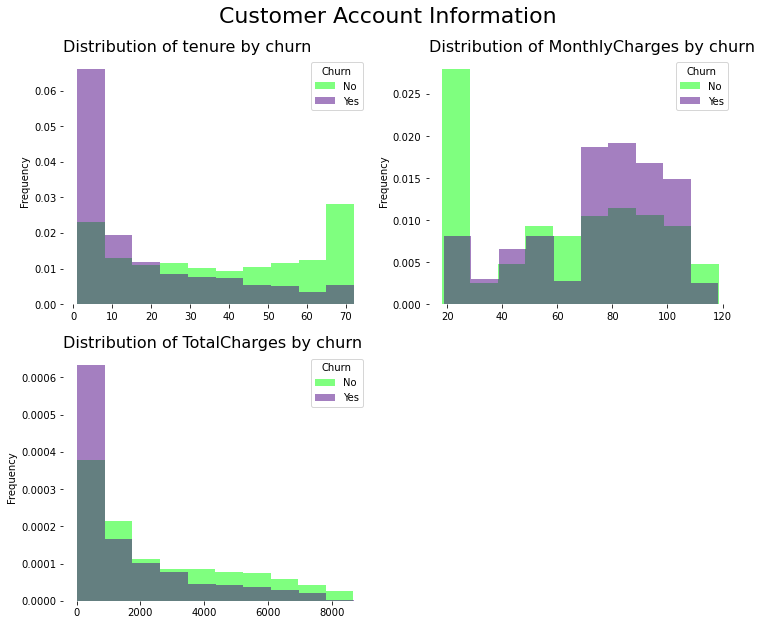

In [31]:
def histogram_plots(columns_to_plot, super_title):
    '''
     Imun histogramme pour chaque variable indépendante de la liste columns_to_plot.
            Paramètres:
                    columns_to_plot (list of string): Noms des variables à tracer
                    super_title (string) : super titre de la visualisation
            Retour:
                    Aucun


    '''
    # définir le nombre de lignes et le nombre de colonnes


    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # créer une figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # boucle vers chaque nom de colonne démographique pour créer un plot


    for index, column in enumerate(columns_to_plot, 1):

        # créer un subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='lime', label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='indigo', label='Yes')
        
        # définir la légende
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            

account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

histogram_plots(account_columns_numeric, 'Customer Account Information')
    
     

Nous pouvons extraire les conclusions suivantes en analysant les histogrammes ci-dessus :

Le taux de churn a tendance à être plus élevé lorsque les frais mensuels sont élevés.
Les nouveaux clients (faible ancienneté) sont plus susceptibles de se désabonner.
Les clients dont les charges totales sont élevées sont moins susceptibles de quitter l'entreprise.

### Informations sur les services

Enfin, nous évaluons le pourcentage de la cible pour chaque catégorie des colonnes de services avec des diagrammes à barres empilées.

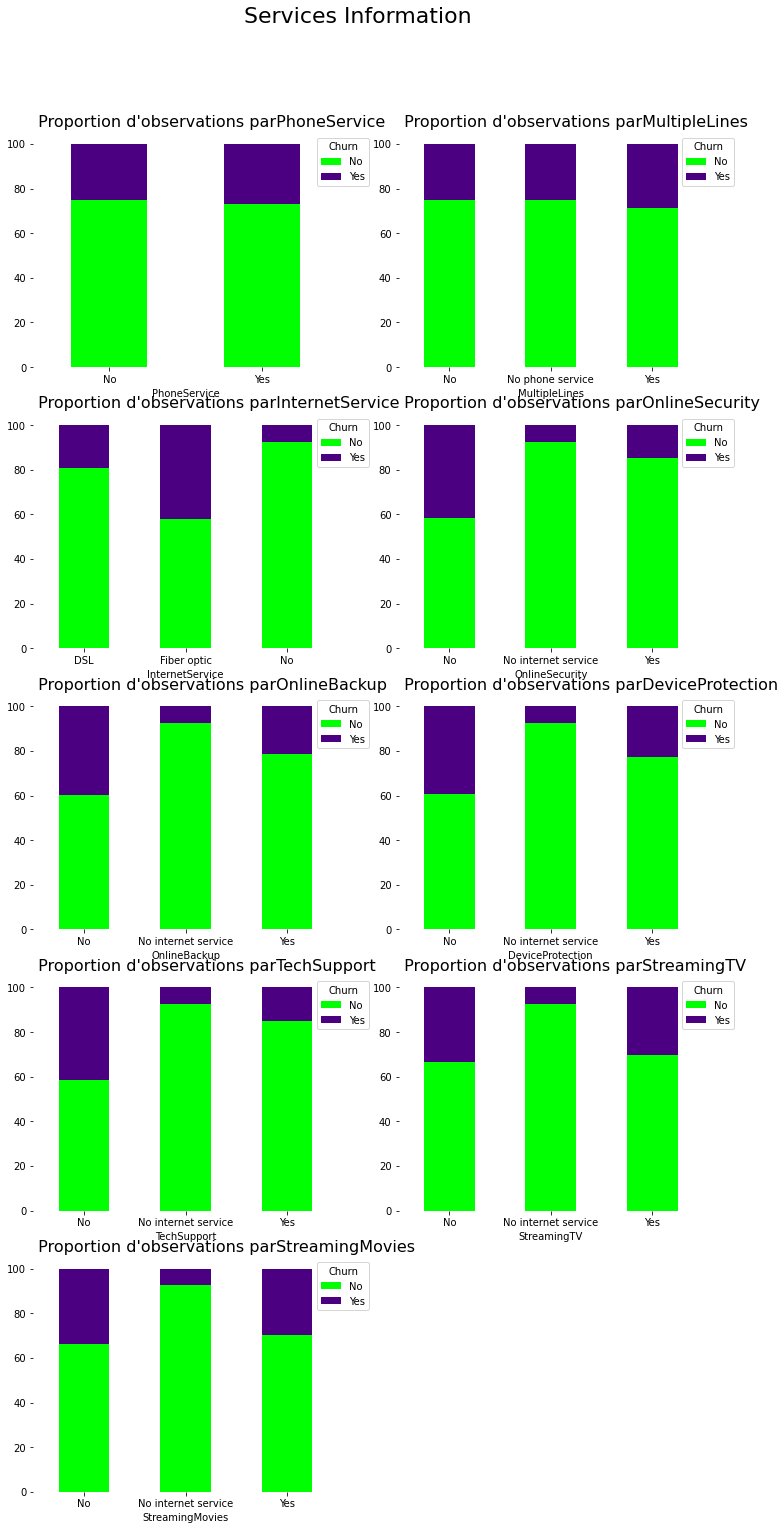

In [32]:
# noms de colonnes de services
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# tracer le graphe
percentage_stacked_plot(services_columns, 'Services Information')

Nous pouvons extraire les conclusions suivantes en évaluant les attributs des services :

Nous ne nous attendons pas à ce que les attributs téléphoniques (PhoneService et MultipleLines) aient un pouvoir prédictif significatif. Le pourcentage de désabonnement pour toutes les classes dans les deux variables indépendantes est presque le même.
Les clients disposant d'une sécurité en ligne chuttent moins que ceux qui n'en ont pas.
Les clients sans support technique ont tendance à se désabonner plus souvent que ceux qui bénéficient d'un support technique.
En regardant les graphiques ci-dessus, nous pouvons identifier les attributs les plus pertinents pour détecter le churn. Nous nous attendons à ce que ces attributs soient discriminants dans nos futurs modèles.




# 4. Importance des variables 

importance des variables (Feature Importance) mesure la dépendance mutuelle entre deux variables sur la base d'estimations d'entropie. En apprentissage automatique, nous nous intéressons à évaluer le degré de dépendance entre chaque variable indépendante et la variable réponse. Des valeurs plus élevées d'information mutuelle montrent un degré de dépendance plus élevé, ce qui indique que la variable indépendante sera utile pour prédire la cible.

La bibliothèque Scikit-Learn a implémenté des informations mutuelles dans le package de métriques. Le code suivant calcule le score d'information mutuelle entre chaque variable catégorielle de l'ensemble de données et la variable Churn.



In [43]:
# fonction qui calcule le score d'information mutuelle entre une série catégorielle et la colonne Churn
from sklearn.metrics import mutual_info_score
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# sélectionner les variables catégorielles en excluant la variable de réponse qui est churn
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)


feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)


print(feature_importance)


Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


L'information mutuelle nous permet non seulement de mieux comprendre nos données mais aussi d'identifier les variables prédictives totalement indépendantes de la cible. Comme indiqué ci-dessus, le sexe, PhoneService et MultipleLines ont un score d'information mutuelle très proche de 0, ce qui signifie que ces variables n'ont pas de relation forte avec la cible. Cette information est conforme aux conclusions que nous avons précédemment tirées en visualisant les données. Dans les étapes suivantes, nous devrions envisager de supprimer ces variables de l'ensemble de données avant la formation, car elles ne fournissent pas d'informations utiles pour prédire le résultat.

L'information mutuelle étend la notion de corrélation aux relations non linéaires puisque, contrairement au coefficient de corrélation de Pearson, cette méthode est capable de détecter non seulement des relations linéaires mais aussi des relations non linéaires.



# 5. Feature Engineering

L'ingénierie des fonctionnalités est le processus d'extraction des fonctionnalités des données et de leur transformation dans un format adapté au modèle d'apprentissage automatique. Dans ce projet, nous devons transformer à la fois des variables numériques et catégorielles. La plupart des algorithmes d'apprentissage automatique nécessitent des valeurs numériques ; par conséquent, tous les attributs catégoriels disponibles dans l'ensemble de données doivent être encodés sous forme d'étiquettes numériques avant de former le modèle. De plus, nous devons transformer les colonnes numériques en une échelle commune. Cela empêchera que les colonnes avec de grandes valeurs dominent le processus d'apprentissage. Les techniques mises en œuvre dans ce projet sont décrites plus en détail ci-dessous. Toutes les transformations sont implémentées en utilisant uniquement Pandas ; cependant, nous proposons également une implémentation alternative à l'aide de Scikit-Learn. Comme vous pouvez le voir, il existe plusieurs façons de résoudre le même problème

## Aucune modification
La colonne SeniorCitizen est déjà une colonne binaire et ne doit pas être modifiée.

## Encodage des étiquettes

L'encodage d'étiquette est utilisé pour remplacer les valeurs catégorielles par des valeurs numériques. Cet encodage remplace chaque catégorie par une étiquette numérique. Dans ce projet, nous utilisons l'encodage d'étiquette avec les variables binaires suivantes : (1) sexe, (2) partenaire, (3) personnes à charge, (4) facturation sans papier, (5) service de téléphone et (6) désabonnement.



In [44]:
df_trans = df.copy()

# encodage des étiquettes (variables binaires)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encoder des caractéristiques binaires catégorielles à l'aide de l'encodage d'étiquettes
for column in label_encoding_columns:
    if column == 'gender':
        df_trans[column] = df_trans[column].map({'Female': 1, 'Male': 0})
    else: 
        df_trans[column] = df_trans[column].map({'Yes': 1, 'No': 0}) 

## One-Hot Encoding

L'encodage à chaud crée une nouvelle colonne binaire pour chaque niveau de la variable catégorielle. La nouvelle colonne contient des zéros et des uns indiquant l'absence ou la présence de la catégorie dans les données. Dans ce projet, nous appliquons un encodage one-hot aux variables catégorielles suivantes : (1) Contract, (2) PaymentMethod, (3) MultipleLines, (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection , (8) TechSupport, (9) StreamingTV et (10)StreamingMovies.



In [45]:

one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

df_trans = pd.get_dummies(df_trans, columns = one_hot_encoding_columns)

Le principal inconvénient de cet encodage est l'augmentation significative de la dimensionnalité du jeu de données (malédiction de la dimensionnalité) ; par conséquent, cette méthode doit être évitée lorsque la colonne catégorielle contient un grand nombre de valeurs uniques.



## Normalisation

La normalisation des données est une pratique courante en apprentissage automatique qui consiste à transformer des colonnes numériques à une échelle commune. Dans l'apprentissage automatique, certaines valeurs de caractéristiques diffèrent plusieurs fois des autres. Les caractéristiques avec des valeurs plus élevées domineront le processus d'apprentissage ; cependant, cela ne signifie pas que ces variables sont plus importantes pour prédire la cible. La normalisation des données transforme les données multi-échelles à la même échelle. Après normalisation, toutes les variables ont une influence similaire sur le modèle, améliorant la stabilité et les performances de l'algorithme d'apprentissage.

Il existe plusieurs techniques de normalisation en statistique. Dans ce projet, nous utiliserons la méthode min-max pour redimensionner les colonnes numériques (tenure, MontlyCharges et TotalCharges) à une échelle commune. L'approche min-max (souvent appelée normalisation) redimensionne la caractéristique à une plage fixe de [0,1] en soustrayant la valeur minimale de la caractéristique, puis en divisant par la plage.



In [46]:
# min-max (variables numeriques)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']


for column in min_max_columns:
        
        min_column = df_trans[column].min()
        
        max_column = df_trans[column].max()
        
        df_trans[column] = (df_trans[column] - min_column) / (max_column - min_column)   


<AxesSubplot:>

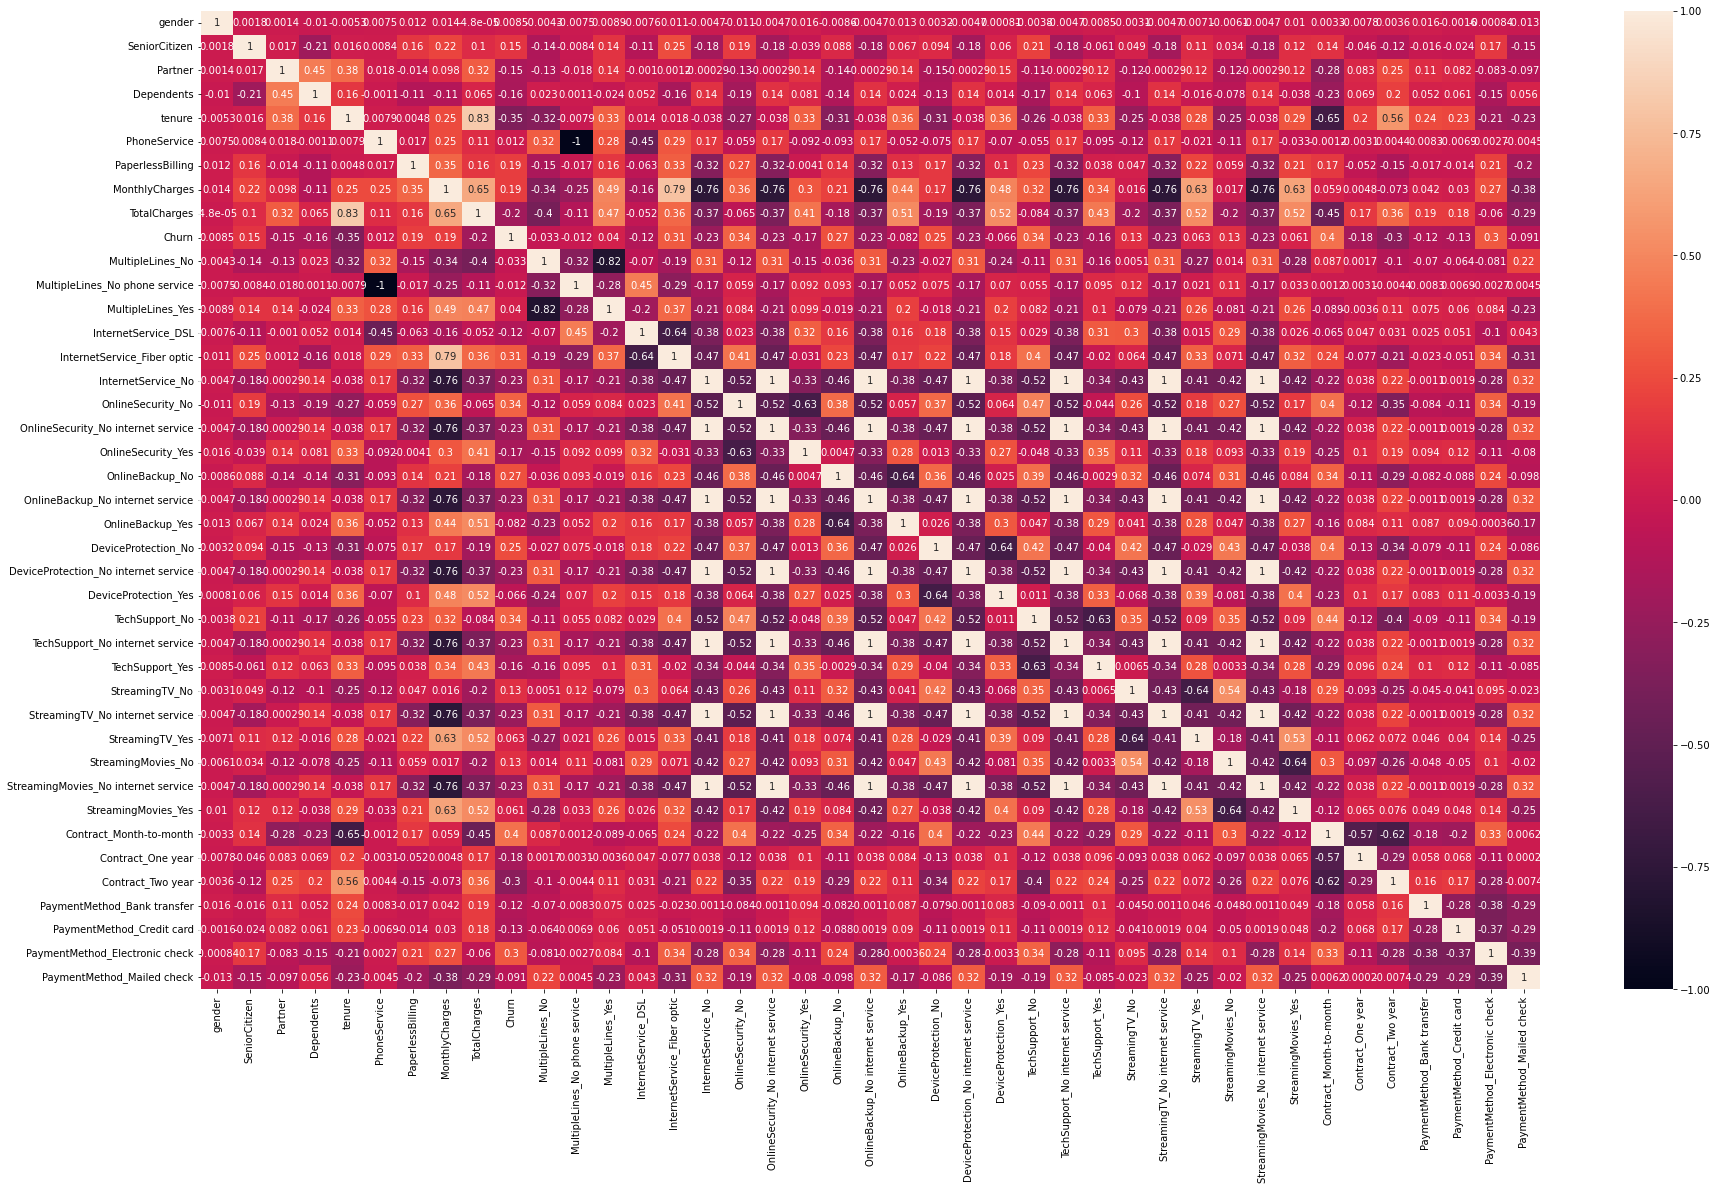

In [51]:
#dependances des variables
data  = df_trans.corr()
plt.figure(figsize = (30,18))
sns.heatmap(data, annot = True)


# 6. Définir une baseline

Dans l'apprentissage automatique, nous utilisons souvent un classificateur simple appelé baseline pour évaluer les performances d'un modèle. Dans ce problème de classification, le taux de clients non désabonnés(classe la plus fréquente) peut être utilisé comme référence pour évaluer la qualité des modèles générés. Ces modèles devraient surpasser les capacités de base à prendre en compte pour les prévisions futures.

# 7. Découpage du jeu de données

La première étape lors de la création d'un modèle consiste à diviser les données en deux groupes, généralement appelés ensembles d'apprentissage et de test. L'ensemble d'apprentissage est utilisé par l'algorithme d'apprentissage automatique pour créer le modèle. L'ensemble de test contient des échantillons qui ne font pas partie du processus d'apprentissage et est utilisé pour évaluer les performances du modèle. Il est important d'évaluer la qualité du modèle à l'aide de données inédites pour garantir une évaluation objective.



Tout d'abord, nous créons une variable X pour stocker les attributs indépendants du jeu de données. De plus, nous créons une variable y pour stocker uniquement la variable cible (Churn).



In [47]:
# sélectionner des variables indépendantes
X = df_trans.drop(columns='Churn')

# sélectionner la variable dépendante
y = df_trans.loc[:, 'Churn']

# prouver que les variables ont été sélectionnées correctement
print(X.columns)


print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

Ensuite, nous pouvons utiliser la fonction train_test_split du package sklearn.model_selection pour créer à la fois les ensembles d'entraînement et de test.



In [48]:
# diviser les données en ensembles d'apprentissage et de test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

# 8. Comparaison des algorithmes

La sélection d'algorithmes est un défi clé dans tout projet d'apprentissage automatique, car il n'existe pas d'algorithme qui soit le meilleur pour tous les projets. En règle générale, nous devons évaluer un ensemble de candidats potentiels et sélectionner pour une évaluation plus approfondie ceux qui offrent de meilleures performances.

Dans ce projet, nous comparons 6 algorithmes différents, tous déjà implémentés dans Scikit-Learn.

* Dummy classifier (baseline);
* K Nearest Neighbours;
* Logistic Regression;
* Support Vector Machines;
* Random Forest;
* Gradient Boosting

In [49]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier





def create_models(seed=2):
    '''
    Créez une liste de modèles d'apprentissage automatique.
            Paramètres:
                    seed (entier) : graine aléatoire des modèles
            Retour:
                    models (list) : liste contenant les modèles


    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    
    return models

# créer une liste avec tous les algorithmes que nous allons évaluer


models = create_models()


In [50]:
# tester la précision de chaque modèle en utilisant des hyperparamètres par défaut
from sklearn.metrics import accuracy_score


results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # ajuster le modèle avec les données d'entraînement
    model.fit(X_train, y_train).predict(X_test)
    # faire des prédictions avec les données de test
    predictions = model.predict(X_test)
    # calculer la précision 
    accuracy = accuracy_score(y_test, predictions)
    # ajouter le nom du modèle et la précision dans la liste
    results.append(accuracy)
    names.append(name)
    
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.745164960182025)
Classifier: k_nearest_neighbors, Accuracy: 0.7531285551763367)
Classifier: logistic_regression, Accuracy: 0.7923777019340159)
Classifier: support_vector_machines, Accuracy: 0.7878270762229806)
Classifier: random_forest, Accuracy: 0.7713310580204779)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)


Parmis ces 6 modèles,le gradient boosting présente une plus grande précision par rapport aux autres modèles, près de 80%.
Il est important de garder à l'esprit que nous avons formé tous les algorithmes en utilisant les hyperparamètres par défaut. La précision de nombreux algorithmes d'apprentissage automatique est très sensible aux hyperparamètres choisis pour la formation du modèle. Une analyse plus approfondie comprendra une évaluation d'une gamme plus large d'hyperparamètres (pas seulement des valeurs par défaut) avant de choisir un modèle (ou des modèles) pour le réglage des hyperparamètres. Néanmoins, cela sort du cadre de cet article. 

## 9. Conclusion

Dans cet article, nous avons parcouru un projet complet d'apprentissage automatique de bout en bout. Nous avons commencé par nettoyer les données et les analyser avec la visualisation. Ensuite, pour pouvoir construire un modèle de machine learning, nous avons transformé les données catégorielles en variables numériques (feature engineering). Après avoir transformé les données, nous avons essayé 6 algorithmes d'apprentissage automatique différents en utilisant des paramètres par défaut. Et Le modèle Gradient Boosting a donné la meilleure une précision de près de 80 %.

Il est important de souligner que les étapes exactes d'une tâche d'apprentissage automatique varient selon le projet. Bien que dans l'article nous ayons suivi un processus linéaire, les projets d'apprentissage automatique ont tendance à être des processus itératifs plutôt que linéaires, où les étapes précédentes sont souvent revisitées à mesure que nous en apprenons davantage sur le problème que nous essayons de résoudre.

